In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

np.random.seed(1111)
sns.set(style='white', color_codes=True)

In [2]:
def sample_from_model(model, epsilon=None):
    if epsilon is None:
        epsilon = np.random.randn(len(model))
    sample = {}
    for variable, function in model.items():
        sample[variable] = function(epsilon, **sample)
    return sample


def plot_scatter(model, num_samples, x, y):
    samples = [sample_from_model(model) for _ in range(num_samples)]
    sns.lmplot(data=pd.DataFrame(samples), x=x, y=y)


def plot_joint(model, num_samples, x, y, **kwargs):
    samples = [sample_from_model(model) for _ in range(num_samples)]
    sns.jointplot(data=pd.DataFrame(samples), x=x, y=y, **kwargs)


def intervene(model, **interventions):
    new_model = model.copy()
    for variable, value in interventions.items():
        new_model[variable] = lambda epsilon, **kwargs: value
    return new_model


def plot_marginal(model, variable, num_samples=1000000, **kwargs):
    samples = [sample_from_model(model) for _ in range(num_samples)]
    sns.kdeplot(data=pd.DataFrame(samples)[variable], **kwargs)


def plot_conditional(model, target_variable, given_variable, value, num_samples=1000000, tol=0.1, **kwargs):
    samples = [sample_from_model(model) for _ in range(num_samples)]
    samples = pd.DataFrame(samples)
    filtered = samples[samples[given_variable].apply(lambda x: (x - value)**2 < tol**2)]
    sns.kdeplot(data=filtered[target_variable], **kwargs)


def plot_intervention_conditional(model, target_variable, given_variable, value, num_samples=100000, tol=0.1, **kwargs):
    samples = [sample_from_model(intervene(model, **{given_variable:value})) for _ in range(num_samples)]
    samples = pd.DataFrame(samples)
    filtered = samples[samples[given_variable].apply(lambda x: (x - value)**2 < tol**2)]
    sns.kdeplot(data=filtered[target_variable], **kwargs)

\begin{align}
x &= \epsilon_{1} \\
y &= x + 1 + \sqrt{3} * \epsilon_{2}
\end{align}

In [3]:
#  x --> y
model_xy = OrderedDict([
    ('x', lambda epsilon, **kwargs: epsilon[0]),
    ('y', lambda epsilon, x, **kwargs: x + 1 + np.sqrt(3) * epsilon[1])
])

\begin{align}
y &= 1 + 2 * \epsilon_{1} \\
x &= 0.25 * (y - 1) + \sqrt{0.75} * \epsilon_{2}
\end{align}

In [4]:
#  y --> x
model_yx = OrderedDict([
    ('y', lambda epsilon, **kwargs: 1 + 2 * epsilon[0]),
    ('x', lambda epsilon, y, **kwargs: 0.25 * (y - 1) + np.sqrt(0.75) * epsilon[1])
])

\begin{align}
z &= \epsilon_{1} \\
x &= z \\
y &= z + 1 + \sqrt{3} * \epsilon_{2}
\end{align}

In [5]:
#  x <-- z --> y
model_conf = OrderedDict ([
    ('z', lambda epsilon, **kwargs: epsilon[0]),
    ('x', lambda epsilon, z, **kwargs: z),
    ('y', lambda epsilon, z, **kwargs: z + 1 + np.sqrt(3) * epsilon[1])
])

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


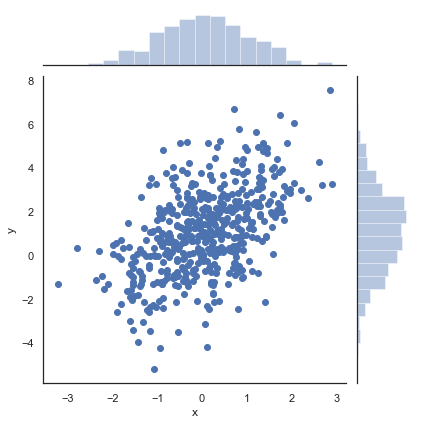

In [6]:
plot_joint(model_xy, 500, 'x', 'y', color='b')
plt.savefig('./Figs/model_xy.pdf')

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


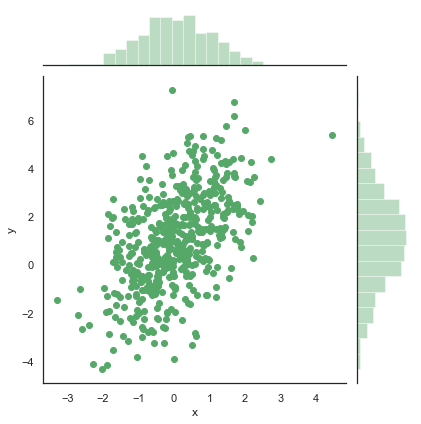

In [7]:
plot_joint(model_yx, 500, x='x', y='y', color='g')
plt.savefig('./Figs/model_yx.pdf')

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


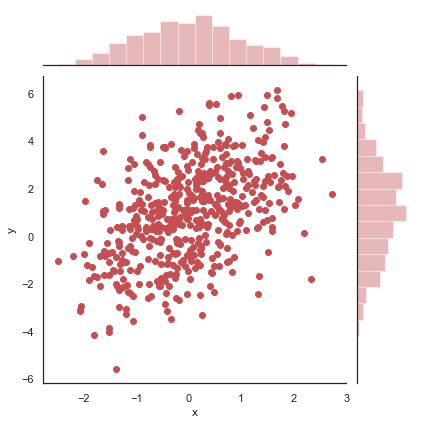

In [8]:
plot_joint(model_conf, 500, x='x', y='y', color='r')
plt.savefig('./Figs/model_conf.pdf')

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


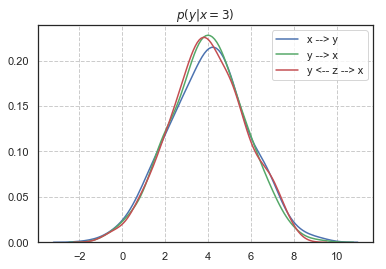

In [9]:
plot_conditional(model_xy, 'y', 'x', 3, color='b')
plot_conditional(model_yx, 'y', 'x', 3, color='g')
plot_conditional(model_conf, 'y', 'x', 3, color='r')
plt.legend(['x --> y', 'y --> x', 'y <-- z --> x'])
plt.title('$p(y\\vert x=3)$')
plt.grid(linestyle='--')
plt.savefig('./Figs/conditional.pdf')

\begin{align}
x &= \epsilon_{1} \\
x &= 3 \\
y &= x + 1 + \sqrt{3} * \epsilon_{2} \\
x &= 3
\end{align}

\begin{align}
y &= 1 + 2 * \epsilon_{1} \\
x &= 3 \\
x &= 0.25 * (y - 1) + \sqrt{0.75} * \epsilon_{2} \\
x &= 3
\end{align}

\begin{align}
z &= \epsilon_{1} \\
x &= 3 \\
x &= z \\
x &= 3 \\
y &= z + 1 + \sqrt{3} * \epsilon_{2} \\
x &= 3
\end{align}

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


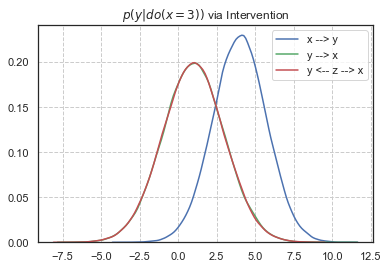

In [10]:
plot_intervention_conditional(model_xy, 'y', 'x', 3, color='b')
plot_intervention_conditional(model_yx, 'y', 'x', 3, color='g')
plot_intervention_conditional(model_conf, 'y', 'x', 3, color='r')
plt.legend(['x --> y', 'y --> x', 'y <-- z --> x'])
plt.title('$p(y\\vert do(x=3))$ via Intervention')
plt.grid(linestyle='--')
plt.savefig('./Figs/intervention.pdf')

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


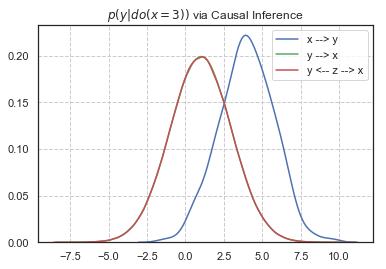

In [11]:
plot_conditional(model_xy, 'y', 'x', 3, color='b')
plot_marginal(model_yx, 'y', color='g')
plot_marginal(model_conf, 'y', color='r')
plt.legend(['x --> y', 'y --> x', 'y <-- z --> x'])
plt.title('$p(y\\vert do(x=3))$ via Causal Inference')
plt.grid(linestyle='--')
plt.savefig('./Figs/causal.pdf')

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


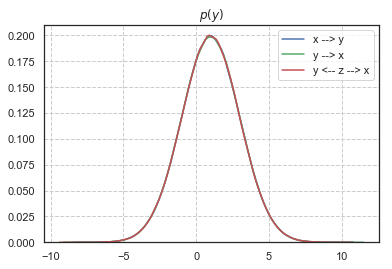

In [12]:
plot_marginal(model_xy, 'y', color='b')
plot_marginal(model_yx, 'y', color='g')
plot_marginal(model_conf, 'y', color='r')
plt.legend(['x --> y', 'y --> x', 'y <-- z --> x'])
plt.title('$p(y)$')
plt.grid(linestyle='--')
plt.savefig('./Figs/marginal.pdf')

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-8, 8)

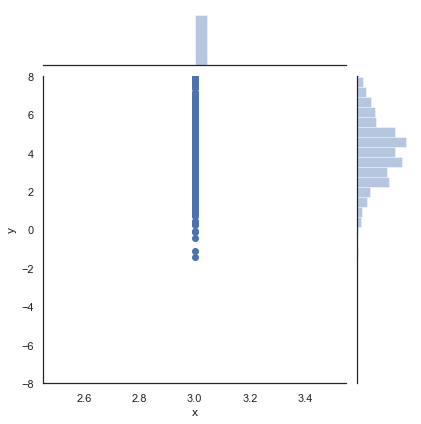

In [13]:
plot_joint(intervene(model_xy, x=3), 500, x='x', y='y', color='b')
plt.ylim([-8, 8])

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-8, 8)

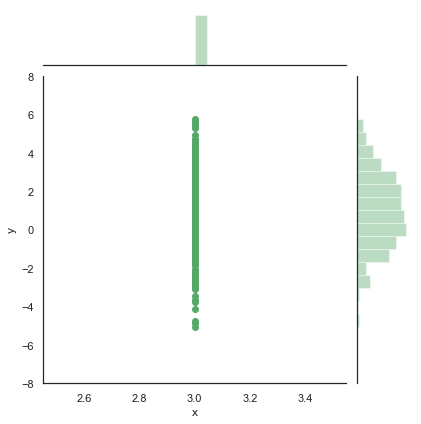

In [14]:
plot_joint(intervene(model_yx, x=3), 500, x='x', y='y', color='g')
plt.ylim([-8, 8])

C:\Users\dongqian\AppData\Local\Continuum\anaconda3\envs\torch041\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-8, 8)

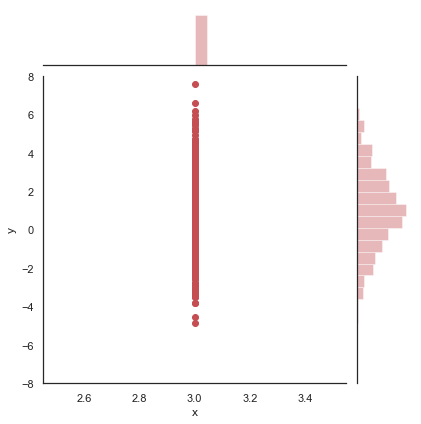

In [15]:
plot_joint(intervene(model_conf, x=3), 500, 'x', 'y', color='r')
plt.ylim([-8, 8])

\begin{align}
y &= \epsilon_{1} \\
x &= y^{2} + \epsilon_{2}
\end{align}

In [16]:
def sample_from_uniform(model, epsilon=None):
    if epsilon is None:
        epsilon = np.random.uniform(low=-1.0, high=1.0, size=len(model))
    sample = {}
    for variable, function in model.items():
        sample[variable] = function(epsilon, **sample)
    return sample


def predict_effect(sample):
    prediction = {}
    for variable, value in sample.items():
        if variable == 'y':
            prediction[variable] = value
            epsilon_x = np.random.uniform(low=-1.0, high=1.0, size=5000)
            prediction['x'] = np.mean(epsilon_x + math.pow(value, 2))
    return prediction


def plot_scatter(samples, x, y, **kwargs):
    sns.scatterplot(data=pd.DataFrame(samples), x=x, y=y, **kwargs)

In [17]:
#  y --> x, y and x are drawn from a uniform distribution, P(effect | causal) * P(causal)
model_yx = OrderedDict([
    ('y', lambda epsilon, **kwargs: epsilon[0]),
    ('x', lambda epsilon, y, **kwargs: math.pow(y, 2) + epsilon[1])
])

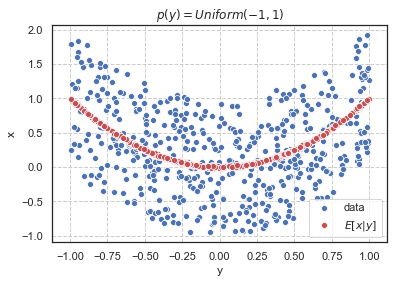

In [18]:
samples = [sample_from_uniform(model_yx) for _ in range(500)]

pred_effect = [predict_effect(sample) for sample in samples]

plot_scatter(samples, 'y', 'x', label='data')
plot_scatter(pred_effect, 'y', 'x', label='$E[x \\vert y]$', color='r')
plt.title('$p(y) = Uniform(-1, 1)$')
plt.legend()
plt.grid(linestyle='--')

In [ ]:
def sample_counterfactuals(model, epsilon=None, **interventions):
    mutilated_model = intervene(model, **interventions)
    if epsilon is None:
        epsilon = randn(len(model))
    factual_sample = sample_from_model(model, epsilon)
    counterfactual_sample = sample_from_model(mutilated_model, epsilon)
    counterfactual_sample = dict((key + '*', value) for key, value in counterfactual_sample.items())
    return {**factual_sample, **counterfactual_sample}